### <b>1 - Preprocessing part</b>

<b>First, we import pandas to read the csv file and do some transformation.</b><br>
<b>We can see the file which passed to the function is an Excel file, due to the inability to retrieve any data from the original csv file.</b><br>
<b>In the first step, we will take a look at some data with <em>head()</em> function to get an idea about the elements on the dataset.</b>

In [34]:
import pandas as pd

df=pd.read_excel('titanic-passengers.xlsx')
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


<b>Next step, we will get some info about the type of elements composing each column and the number of non-null ones.</b>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


<b>On this step, we will pick-up the number of null elements ( Nan element ) on each column, so we can deal with them ( replace or drop regarding the importance of the features).</b>

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b>first, we use the function describe() on each of the 3 columns ( "Age", "Cabin" and "Embarked" ) to get some info so we can replace the NaN values.</b><br>
<b>After gathering some info, we use the function fillna() to replace the NaN values with specific ones. Then we verify if there is no more missing value.</b>

In [4]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<b>mean_age is the average age value of all passengers ages</b>

In [5]:
mean_age=round(df['Age'].mean())
mean_age

30

In [6]:
df['Age'].fillna(mean_age, inplace=True)
df['Age'].isnull().sum()

0

<b>The next code line output different value from the one i did choose to replace with it the missing value</b><br>
<b>i did choose different value because that value will not disturb our work.<b>

In [7]:
df["Cabin"].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [8]:
df["Cabin"].fillna("G6",inplace=True)
df["Cabin"].isnull().sum()

0

In [9]:
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [10]:
df['Embarked'].fillna('S', inplace=True)
df["Embarked"].isnull().sum()

0

<b>In this last step, we verify over the all data frame if there is no more missing values with the 2 functions isnull() and info()</b>

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


<b>For exemple, we can encode the column "survived" no become 0 and yes will be 1 like we see on the cell below, </b><br>
<b>we do that because when we will build the AI model, it will get as input only numerical values not string.</b>

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_df=df['Survived']
new_df=encoder.fit_transform(new_df)
new_df

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,

### <b>2 - Visualization part<b>

<b>We start with importing matplotlib and seaborn wiche will we will need for ploting </b>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<b>a - distribution of the most important features based on my understanding of the dataset</b>
here we will use 2 types of ploting so we can  

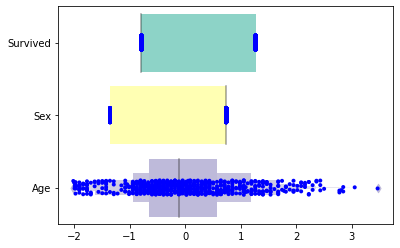

In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

encoder=LabelEncoder()
scaler=StandardScaler()

newdf1=df.drop(["PassengerId",'Pclass',"Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"],axis=1)

newdf1['Survived']=encoder.fit_transform(newdf1['Survived'])
newdf1['Sex']=encoder.fit_transform(newdf1['Sex'])

newdf1['Age']=scaler.fit_transform(newdf1['Age'].values.reshape(-1, 1))
newdf1['Sex']=scaler.fit_transform(newdf1['Sex'].values.reshape(-1, 1))
newdf1['Survived']=scaler.fit_transform(newdf1['Survived'].values.reshape(-1, 1))

sns.boxenplot(data=newdf1,orient="h",palette="Set3",saturation=1)
sns.stripplot(data=newdf1,orient="h",size=4, color="blue")

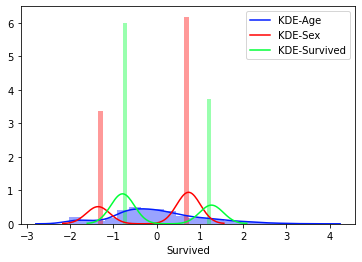

In [93]:
sns.distplot(newdf1["Age"],bins=20,hist=True,kde=True,color="#001BFF",kde_kws={"label":"KDE-Age"})
sns.distplot(newdf1["Sex"],bins=20,hist=True,kde=True,color="#FF0000",kde_kws={"label":"KDE-Sex"})
sns.distplot(newdf1["Survived"],bins=20,hist=True,kde=True,color="#00FF36",kde_kws={"label":"KDE-Survived"})

<b>b - Correlation between Sex and Age concerning their importance in the survival of the individuals</b>

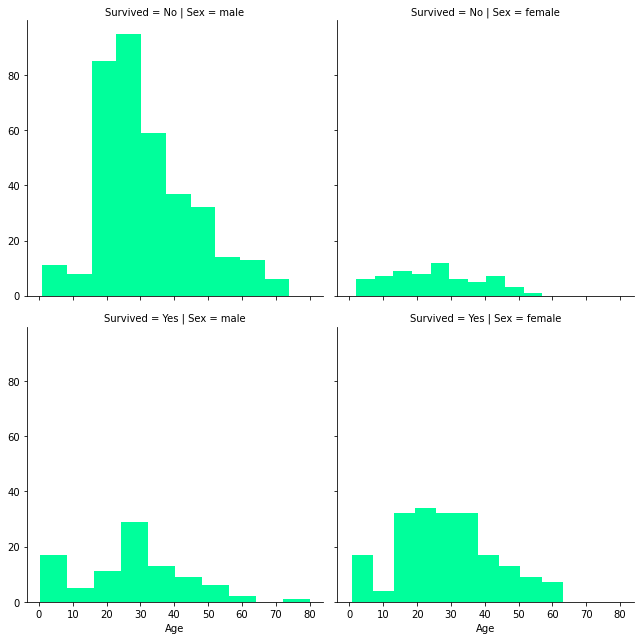

In [98]:
newdf2=df.drop(["PassengerId","Pclass","Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"],axis=1)
grid =sns.FacetGrid(newdf2,row='Survived',col='Sex',height=4.5,aspect=1)
grid.map(plt.hist,'Age',color="#00FF9B")


<b>c - impact of Pclass and Fare on the survival of the individuals</b>